In [87]:
import math
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import random
from statistics import mean 

random.seed(1968)

Comme analyser dans l'exercice précédent, il y a très très peu de différence ici, dans ce cas concret, entre les distributions de probabilité de moyenne dans le cas exhaustif ou pas... Aussi, dans la suite, nous considérerons les formules associées à l'échantillonnage non exhaustif.

In [88]:
mu = 68
sigma = 3

taille_echantillon = 25

In [89]:
sigma_echantillon_non_exhaustif = sigma/math.sqrt(taille_echantillon)

In [90]:
def distr_poids_echantillon(x):
    return norm.pdf((x['poids']-mu)/sigma_echantillon_non_exhaustif)/sigma_echantillon_non_exhaustif

In [91]:
fac = 5
poids_min = mu - fac*sigma_echantillon_non_exhaustif
poids_max = mu + fac*sigma_echantillon_non_exhaustif

distribution_echantillon_df = pd.DataFrame({'poids':np.linspace(poids_min,poids_max,150)})
distribution_echantillon_df['dens'] = distribution_echantillon_df.apply(distr_poids_echantillon,axis=1)

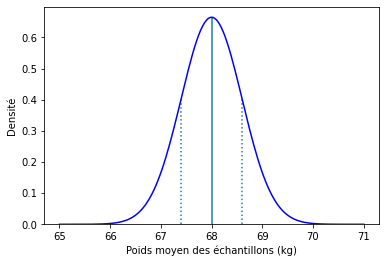

In [92]:
plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif)
plt.vlines([mu-sigma_echantillon_non_exhaustif,mu+sigma_echantillon_non_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_non_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

## Exercice 11.2.a: Poids moyen d'échantillon entre 66.8 et 68.3 kg

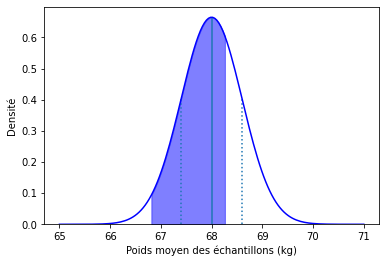

In [93]:
poids_min = 66.8
poids_max = 68.3

plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[(distribution_echantillon_df['poids']>=poids_min)&(distribution_echantillon_df['poids']<=poids_max)]
plt.fill_between(sub_df['poids'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif)
plt.vlines([mu-sigma_echantillon_non_exhaustif,mu+sigma_echantillon_non_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_non_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [94]:
aire = (norm.cdf(poids_max,mu,sigma_echantillon_non_exhaustif)-norm.cdf(poids_min,mu,sigma_echantillon_non_exhaustif))
print('Aire bleue sous la courbe:{:.4f}'.format(aire))
print('ou encore {:.2f}% de chance que la moyenne d\'échantillon tombe dans l\'intervalle [{},{}]'.format(aire*100,poids_min,poids_max))
print('et donc pour 80 tirages, on devrait en obtenir {} avec une moyenne qui tombe dans l\'intervalle [{},{}]'.format(int(round(80*aire)),poids_min,poids_max))

Aire bleue sous la courbe:0.6687
ou encore 66.87% de chance que la moyenne d'échantillon tombe dans l'intervalle [66.8,68.3]
et donc pour 80 tirages, on devrait en obtenir 53 avec une moyenne qui tombe dans l'intervalle [66.8,68.3]


Voyons avec 80 échantillons de taille 25 tirés avec remise de la population initiale:

Créons d'abord la population initiale:

In [95]:
N = 3000
population_df = pd.DataFrame({'poids':np.random.normal(loc=mu,scale=sigma,size=N)})
population_df.head()

,poids
0,66.087404
1,62.807419
2,64.585092
3,73.562080
4,65.207364


... et puis échantillonnons:

In [96]:
n_echantillons = 80

moyenne_list = []
taille_echantillon = 25

for i_echantillons in range(n_echantillons):
    echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
    moyenne_list.append(mean(echantillon))
    
poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})

In [97]:
n_OK = 0
for poids in poids_moyen_df['poids_moyen']:
    if (poids>=poids_min)&(poids<=poids_max):
        n_OK += 1
print('n_OK:{} dans l\'intervalle [{},{}]'.format(n_OK,poids_min,poids_max))

n_OK:48 dans l'intervalle [66.8,68.3]


C proche du résultat théorique estimé: 53... 

sachant que nous avons généré la population initiale de 3000 individus et que nous ne tirons qu'une fois les 80 échantillons!!!

Il y a des fluctuations!!!

## Exercice 11.2.b Poid moyen d'échantillon inférieur à 66.4 kg

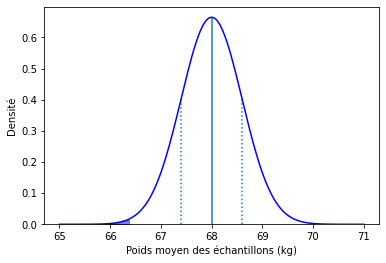

In [98]:
poids_max = 66.4

plt.plot(distribution_echantillon_df['poids'],distribution_echantillon_df['dens'],color='blue')
sub_df = distribution_echantillon_df[distribution_echantillon_df['poids']<=poids_max]
plt.fill_between(sub_df['poids'],sub_df['dens'],color='blue',alpha=0.5)
plt.vlines(mu,ymin=0,ymax=norm.pdf(0)/sigma_echantillon_non_exhaustif)
plt.vlines([mu-sigma_echantillon_non_exhaustif,mu+sigma_echantillon_non_exhaustif],ymin=0,ymax=norm.pdf(1)/sigma_echantillon_non_exhaustif,linestyles='dotted')
plt.xlabel('Poids moyen des échantillons (kg)')
plt.ylabel('Densité')
plt.ylim(bottom=0)
plt.show()

In [99]:
aire = norm.cdf(poids_max,mu,sigma_echantillon_non_exhaustif)

print('Aire bleue sous la courbe:{}'.format(aire))
print('ou {:.4f}% de chance d\'avoir un échantillon de poids moyen inférieur à {}'.format(aire*100,poids_max))
n_echantillons = 80
print('ou encore {:.2f} échantillon de poids moyen inférieur à {} kg sur {} tirages'.format(aire*n_echantillons, poids_max, n_echantillons))
print('soit moins d\'un échantillon...')

Aire bleue sous la courbe:0.003830380567589843
ou 0.3830% de chance d'avoir un échantillon de poids moyen inférieur à 66.4
ou encore 0.31 échantillon de poids moyen inférieur à 66.4 kg sur 80 tirages
soit moins d'un échantillon...


In [100]:
moyenne_list = []
taille_echantillon = 25

for i_echantillons in range(n_echantillons):
    echantillon = random.choices(list(population_df['poids']),k=taille_echantillon)
    #echantillon = random.sample(list(population_df['poids']),taille_echantillon)
    moyenne_list.append(mean(echantillon))
    
poids_moyen_df = pd.DataFrame({'poids_moyen':moyenne_list})

In [101]:
poids_max = 66.4
n_OK = 0
for poids in poids_moyen_df['poids_moyen']:
    if (poids>=poids_min)&(poids<=poids_max):
        n_OK += 1
print('n_OK:{}'.format(n_OK))

n_OK:0


Ce qui correspond bien à l'estimation théorique ci-dessus!!!